In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
# Dataset for training 
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)


In [3]:
# used to check for missing values
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [4]:
# selects column of "Close", replaces any value with comma and replaces it with " ". It also converts the string into a float
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)


In [5]:
# selects column of "Volume", replaces any value with comma and replaces it with " ". It also converts the string into a float
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [6]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


In [7]:
# Used to calculate a rolling mean of the "Close" column in the DataFrame "dataset" and adds it as a new column named "Close: 30 Day Mean"
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()


In [8]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout
from keras.layers import SimpleRNN




In [12]:
# Initialising the RNN
regressor = Sequential()



In [13]:
# Adding the first SimpleRNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 25, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

 #Adding a second SimpleRNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 25, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third SimpleRNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 25, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth SimpleRNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 25))
regressor.add(Dropout(0.2))

# Adding the output layer and some Dropout regularisation
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))



In [14]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 6s 38ms/step - loss: 0.8580
Epoch 2/100
38/38 [==============================] - 2s 40ms/step - loss: 0.6154
Epoch 3/100
38/38 [==============================] - 2s 46ms/step - loss: 0.4621
Epoch 4/100
38/38 [==============================] - 2s 52ms/step - loss: 0.3818
Epoch 5/100
38/38 [==============================] - 2s 43ms/step - loss: 0.2854
Epoch 6/100
38/38 [==============================] - 2s 47ms/step - loss: 0.2450
Epoch 7/100
38/38 [==============================] - 2s 41ms/step - loss: 0.1943
Epoch 8/100
38/38 [==============================] - 2s 48ms/step - loss: 0.1565
Epoch 9/100
38/38 [==============================] - 2s 59ms/step - loss: 0.1270
Epoch 10/100
38/38 [==============================] - 2s 51ms/step - loss: 0.1099
Epoch 11/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0948
Epoch 12/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0805
Epoch 13/100
38/38 [=====

In [15]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)



In [16]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [18]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [19]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [20]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [21]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [22]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 8s 8s/step


In [23]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


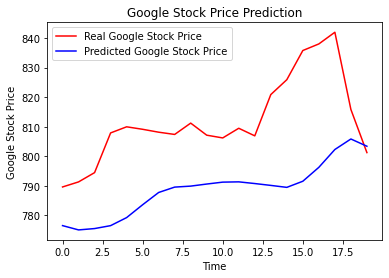

In [24]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import r2_score


accuracy = r2_score(real_stock_price, predicted_stock_price)
print("Accuracy:", accuracy)

Accuracy: -2.380052027543203
